# Support Vector Machines (SVM)
SVM is a supervised learning algorithm used for classification. It can be used to perform binary or multiclass classification. SVM works by finding the best line (or hyperplane in high-dimensional data) that separates the given groups. The objective of SVM learning is to find the best parameters so that the hyperplane separates the data and maximizes the margin (For a simple discussion about the equations of SVM, have a look at [this paper](https://cgp.iiarjournals.org/content/cgp/15/1/41.full.pdf)).

The closest points are called support vectors, and they are the points used by SVM to find the best hyperplane.

<img src="https://raw.githubusercontent.com/abdulrahman1123/analysis_examples/main/SVM_hyperplane.png" width=600 height=200 />

Advantages of SVM include:
- SVM is effective in high dimensional spaces
- Uses a subset of data points to find the best solution (memory efficient)
- Versatility, as it uses different <b>kernel functions</b> to find the best solutions.


### Kernel Functions
Kernel functions are what makes SVM stand out among other similar machine learning algorithms. Originally, SVM was proposed to be a linear classification method. But what would you do if the data are not linearly separable (like in the photo below)?

In this case, a function (or a transformation if you want) is applied to the data, and then SVM will use the transformed data for its learning.

<img src="https://raw.githubusercontent.com/abdulrahman1123/analysis_examples/main/svm_intro.png" width=900 height=300 />

The kernel function in the above image is a custom one, it is applied to to variables, and its function is $f(x_1,x_2) = {x_1}^2+{x_2}^2$

But there are custom functions that you can already use using popular packages like scikit-learn. These include the radial basis function (RBF), polynomial function and linear function. The different kernels have differently-shaped decision boundaries.

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png" width=600 height=500 />

Image reference: [scikit-learn website](https://scikit-learn.org/stable/modules/svm.html#svm-classification)

### Hyperparameters
##### The Hyperparameter C
This is a regularization parameter. It determines the width of the margin. Higher C values give smaller margins, and might be prone to overfitting. While lower C values are associated with larger margins, and the possibility of underfitting. 

<img src="https://raw.githubusercontent.com/abdulrahman1123/analysis_examples/main/SVM_hyperplane_2.png" width=600 height=250 />

##### Hyperparameter gamma
This hyperparameter only applies for the RBF kernel function. It determines how tight the decision boundary is. With lower values being associated with wider decision boundary and more points being grouped together (with the risk of low accuracy). Higher values are associated with points closer together being considered similar, and thus smaller boundaries (with the risk of overfitting).

### When to use SVM
SVM is suitable for classification (for regression, see Support Vector Regression), where the data can be classified into two or more classes. It can also handle complex data, such as images and text. Examples of cases where SVM can be used:
* Classifying patients into cancer and cancer-free using fine-needle aspiration features (such as cell nuclei and mass characteristics)
* Classifying a group of images that are labeled as cats and dogs
* Recognizing handwritten text (identifying what letter each character represent)

## About the Data Used
This dataset was originally publicly available from the paper [Machine Learning Repository of University of California Irvine](http://archive.ics.uci.edu/). This dataset [consists of characteristics, or features, of cell nuclei taken from breast masses which were sampled using fine-needle aspiration (FNA), a common diagnostic procedure in oncology. The clinical samples used to form this dataset were collected from January 1989 to November 1991.] (Sidey-Gibbons and Sidey-Gibbons 2019) Each sample is then classified as malignant or benign in the 'class' column (1= malignant and 0 = benign).


---
## Data Analysis Steps:
### 1. Import libraries and define functions

These are the functions that you will need for your following analyses. <b>This line calls the libraries and functions written in the utils.py file</b>. I kept these functions in another file just for simplicity. You can access it from [THIS LINK](https://github.com/abdulrahman1123/analysis_examples/blob/main/utils.py) if you need.

In [4]:
from utils import *
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics

### 
### 2. Load the data



In [5]:
data_dir = 'https://github.com/abdulrahman1123/analysis_examples/raw/main/breast_cancer_wisconsin.csv'
data = pd.read_csv(data_dir)
data = data.iloc[0:200,:]

data

,ID,thickness,cell_size,cell_shape,adhesion,epithelial_size,bare_nuclei,bland_cromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
195,1212422,4,1,1,1,2,1.0,3,1,1,0
196,1213375,8,4,4,5,4,7.0,7,8,2,0
197,1213383,5,1,1,4,2,1.0,3,1,1,0
198,1214092,1,1,1,1,2,1.0,1,1,1,0


### 
### 3. Create training and test datasets

The following generally applies for all machine learning algorithms:

The first step to do is to <b>split your data into training and testing datasets</b>. The training dataset will be used to train the model and evaluate parameters, while the testing dataset will only be used at the end to test how well did the model learn.

After splitting the data, we will impute the missing values using the mean of each column. This will be done separately for training and testing datasets.

Then, the data will be normalized (mean = 0 and sd = 1) so that the model can coverge faster (i.e. reach the best solution faster)

Size of training dataset = (150, 9) and testing dataset = (50, 9)


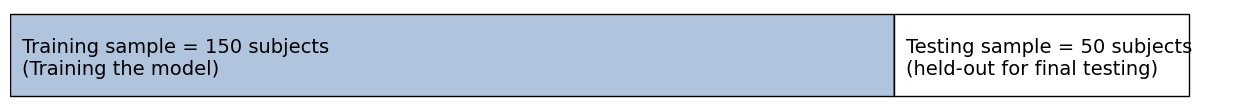

In [6]:
# Choose features
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

# Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

print(f"Size of training dataset = {X_train.shape} and testing dataset = {X_test.shape}")

# Using the mean, impute the training and testing datasets separately
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imp.fit_transform(X_train.copy())
X_test = imp.transform(X_test.copy())


# scale both X_train and X_test for faster convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plot_train_test(X_train,X_test)

### 
###  4. Create the model and find the best hyperparameters
##### What is the best kernel type? What is the best C value and what gamma value should I use?

In order to find the best hyperparameters, we can use grid search cross validation. Using this method, a grid of all possible parameters is checked, and the set of parameters associated with the best model is then chosen. Luckily, this is easily implemented using the GridSearchCV from scikit learn, all we need to do is determine the grid of parameters to be used. The training data will be automatically split into training and validation. scikit-learn will try a number of C and gamma values and determine the accuracy associated with each of them, and then report back the C and gamma values associated with the best accuracy.

<img src="https://raw.githubusercontent.com/abdulrahman1123/analysis_examples/main/train_val_test.png" width=606 height=206 />

First, lets create the appropriate grid of hyperparameters.

In [46]:
param_grid = [
  {'C': np.logspace(-2,6, 10), 'gamma': np.logspace(-1, 3, 10), 'kernel': ['rbf']},
 ]

grid_model = GridSearchCV(SVC(), param_grid, scoring="accuracy", cv=StratifiedKFold(n_splits=5))

print ("\nSearching for the model with best parameters ...\n")

# fit the model to the training data set
grid_model.fit(X_train, y_train)

print('Best score achieved during training = ',np.round(grid_model.best_score_,2))

print('\nThis is the model with best parameters found')
grid_model.best_estimator_


Searching for the model with best parameters ...

Best score achieved during training =  0.98

This is the model with best parameters found


SVC(C=4.6415888336127775, gamma=0.1)

### 
### 5. Apply the model on the testing data set

In [47]:
y_pred = grid_model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sens = tp / (tp + fn)
spec = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
pd.DataFrame([[sens, spec, accuracy]], columns=['Sensitivity', 'Specificity', 'Accuracy'])

,Sensitivity,Specificity,Accuracy
0,1.0,0.791667,0.9


### 
### 5.1. Plot ROC Curve and Print AUC

In [48]:
best_model = grid_model.best_estimator_
best_model.probability = True
best_model.fit(X_train,y_train)

y_probas =grid_model.predict_proba(X_test)[::,1]

_, ax = plt.subplots(figsize = (6.5,5))
metrics.RocCurveDisplay.from_predictions(y_test, y_probas,name="Malignant vs Benign", color="darkred",ax=ax)
plt.xlabel("False Positive Rate", fontsize = 16)
plt.ylabel("True Positive Rate", fontsize = 16)
ax.set_xticks(labels=['0%', '20%', '40%', '60%', '80%', '100%'], ticks=np.arange(0,1.1,0.2), fontsize = 12)
ax.set_yticks(labels=['0%', '20%', '40%', '60%', '80%', '100%'], ticks=np.arange(0,1.1,0.2), fontsize = 12)
plt.title("Reciever Operating Characterstic for Predicting\nCancer Malignancy", fontsize = 18,weight = 'bold')
plt.legend()

# Extra: Plot the best hyperplane found by SVM

In [49]:
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier

def find_importance(X_loc, y_loc):
    """
    Determine variable importance using a simple random forest model. Used for plotting purposes, e.g.,
    to plot the most important 3 variables.
    X_loc: dataset containing the variables to be checked
    y_loc: np.array containing classes
    """
    rf = RandomForestClassifier(random_state=2)
    rf.fit(X_loc,y_loc)
    forest_importances = pd.Series(rf.feature_importances_, index = X_loc.columns)
    forest_importances = forest_importances[np.argsort(forest_importances)[::-1]]; print(forest_importances)
    return forest_importances

def plot_dec_bound(loc_model, X_loc, y_loc, title = 'Decision Boundary', n_lvls = 10, plot_type = '2d',
                   plot_original = False, or_data = None, or_response = None, c_threshold = 0.5, figsize = 'large'):
    '''
    Plot decision boundary for a given model. The function will first run a random forest model to determine
    the best factors for plotting (in case you have many factors). In case a 2d plot is required and more
    than 2 variables are available, the first 2 will be plotted (as determined by random forest importance) and the
    model will be run on these two variables + the median of any additional column.
    :param loc_model: the model whose boundary to be plotted
    :param X_loc: the data the model will be fitted to
    :param y_loc: true labels associated with X_loc
    :param title: figure title
    :param n_lvls: number of levels to plot if 3d plotting is chosen. recommended to be <40. Otherwise it will be slow
    :param plot_type: 2d or 3d plot
    :return: plot of decision boundary
    '''
    # Arrange by best predictors, so that you plot the best two against each other
    new_loc_model =clone(loc_model)
    importance =  find_importance(X_loc, y_loc)
    new_X_loc = X_loc.loc[:,importance.index]
    new_loc_model.fit(new_X_loc,y_loc)

    # Plotting paradigm
    x_min, x_max = new_X_loc.iloc[:,0].min() - 1, new_X_loc.iloc[:,0].max() + 1
    y_min, y_max = new_X_loc.iloc[:,1].min() - 1, new_X_loc.iloc[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    if plot_original:
        prob = loc_model.predict_proba(or_data)[:, 1]
        X_excluded = or_data.loc[(prob < (1 - c_threshold)) & (prob > c_threshold), importance.index]
        X_included = or_data.loc[[ind not in X_excluded.index for ind in or_data.index], :]
        response_included = or_response[[ind not in X_excluded.index for ind in or_data.index]]
        pred = loc_model.predict(X_included)
        X_wrong = X_included.loc[np.array(response_included != pred), importance.index]  # wrong classes
        new_X_loc = X_included.loc[:, importance.index]
        y_loc = response_included

    if plot_type == '2d' or X_loc.shape[1] == 2:
        # The dataframe that will get into the model
        all_data = [xx.ravel(),yy.ravel()]+[np.ones(xx.shape[0]*xx.shape[1])*new_X_loc.iloc[:,i].mean() for i in range(2,new_X_loc.shape[1])]
        X_model = pd.DataFrame(np.c_[all_data].T,columns=new_X_loc.columns)
        Z = new_loc_model.predict(X_model)
        Z = Z.reshape(xx.shape)
        colors= np.where(y_loc == 1,'royalblue','darkred')


        fig, ax = plt.subplots()
        ax.contour(xx, yy, Z, cmap = 'RdBu', alpha=0.4)
        ax.scatter(new_X_loc.iloc[:,0],new_X_loc.iloc[:,1], c = colors,edgecolors = 'black', linewidths = 0.75)
        ax.set_ylabel(new_X_loc.columns[1], font= 'Calibri', size = 14)
        ax.set_xlabel(new_X_loc.columns[0], font= 'Calibri', size = 14)
        ax.set_title(title, font= 'Calibri', size = 16)
        if plot_original:
            ax.scatter(X_wrong.iloc[:, 0], X_wrong.iloc[:, 1], c='black', s=60, marker='x')
            ax.scatter(X_excluded.iloc[:, 0], X_excluded.iloc[:, 1], c='white', edgecolors='black', s=60)

    elif plot_type == '3d':
        z_min, z_max = new_X_loc.iloc[:, 2].min() - 1, new_X_loc.iloc[:, 2].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

        all_data_list = []
        for item in np.linspace(z_min,z_max,n_lvls):
            added_data = [xx.ravel(), yy.ravel()] + [np.ones(xx.shape[0] * xx.shape[1]) * item]
            for i in range(3,new_X_loc.shape[1]):
                added_data.append(np.ones(xx.shape[0]*xx.shape[1]) * new_X_loc.iloc[:,i].mean())
            all_data_list.append(added_data)

        X_model_list = [pd.DataFrame(np.c_[all_data].T, columns=new_X_loc.columns) for all_data in all_data_list]
        Z_list = np.array([new_loc_model.predict(X_model) for X_model in X_model_list])
        Z = Z_list.reshape((n_lvls,xx.shape[0],xx.shape[1]))

        fig = plt.figure(figsize=(9,8) if figsize=='large' else (6,5))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(new_X_loc.iloc[:, 0], new_X_loc.iloc[:, 1], new_X_loc.iloc[:, 2],s=60,c=np.where(y_loc>0,'royalblue','darkred'),edgecolors = 'black', linewidths = 0.75)
        ax.set_zlabel(new_X_loc.columns[2], font='Calibri', size=14)
        ax.set_ylabel(new_X_loc.columns[1], font='Calibri', size=14)
        ax.set_xlabel(new_X_loc.columns[0], font='Calibri', size=14)
        for i in range(n_lvls):
            ax.contour(xx, yy, Z[i,:,:], zdir='z', offset=np.linspace(z_min,z_max,n_lvls)[i], cmap='RdBu', alpha=0.4)
        if plot_original:
            ax.scatter(X_wrong.iloc[:, 0], X_wrong.iloc[:, 1], X_wrong.iloc[:, 2], c='black', s=60, marker='x')
            ax.scatter(X_excluded.iloc[:, 0], X_excluded.iloc[:, 1], X_excluded.iloc[:, 2], c='white',
                       edgecolors='black', s=60)

    return fig, ax

X_loc = pd.DataFrame(X_train, columns = X.columns)
plot_dec_bound(best_model, X_loc, y_train, title = 'Decision Boundary', n_lvls = 20, plot_type = '3d',
                   plot_original = False, or_data = None, or_response = None, c_threshold = 0.5, figsize = 'large')

C:\Users\Sawalma_A\AppData\Local\Temp\ipykernel_21880\1749627341.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forest_importances = forest_importances[np.argsort(forest_importances)[::-1]]; print(forest_importances)


cell_size          0.310150
cell_shape         0.226689
epithelial_size    0.145011
bare_nuclei        0.090341
normal_nucleoli    0.070142
adhesion           0.064536
thickness          0.056151
bland_cromatin     0.029981
mitoses            0.006999
dtype: float64


(<Figure size 900x800 with 1 Axes>,
 <Axes3D: xlabel='cell_size', ylabel='cell_shape', zlabel='epithelial_size'>)

# 
---
# References and Further Reading
[Introduction to Support Vector Machines (SVM)](https://www.geeksforgeeks.org/introduction-to-support-vector-machines-svm/)

[Classifying data using Support Vector Machines(SVMs) in Python](https://www.geeksforgeeks.org/classifying-data-using-support-vector-machinessvms-in-python/)

[Huang, Shujun, et al. "Applications of support vector machine (SVM) learning in cancer genomics." Cancer genomics & proteomics 15.1 (2018): 41-51.‏](https://cgp.iiarjournals.org/content/cgp/15/1/41.full.pdf))

[Scikit-Learn Website: Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)

[Scikit-learn website: Grid Search](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)